# Random Code DAG

In [87]:
import networkx as nx
import numpy as np

def random_dag(n):
    # Create a directed acyclic graph
    G = nx.DiGraph()

    # Generate file sizes using a lognormal distribution
    file_sizes = np.random.lognormal(mean=5, sigma=1, size=n)
    # Add nodes with file size attributes
    for i in range(n):
        G.add_node(i, size=file_sizes[i])

    # Add edges to simulate dependencies, preferring smaller files to depend on larger ones
    for i in range(n):
        num_dependencies = np.random.poisson(2)  # Average number of dependencies
        if i > 0:
            # Sort potential dependencies by size in descending order (larger files first)
            potential_dependencies = sorted(range(i), key=lambda x: file_sizes[x], reverse=True)
            # Bias selection towards larger files by taking the top candidates
            dependencies = np.random.choice(
                potential_dependencies,
                size=min(num_dependencies, i),
                replace=False
            )
            for dep in dependencies:
                G.add_edge(dep, i)

    return G

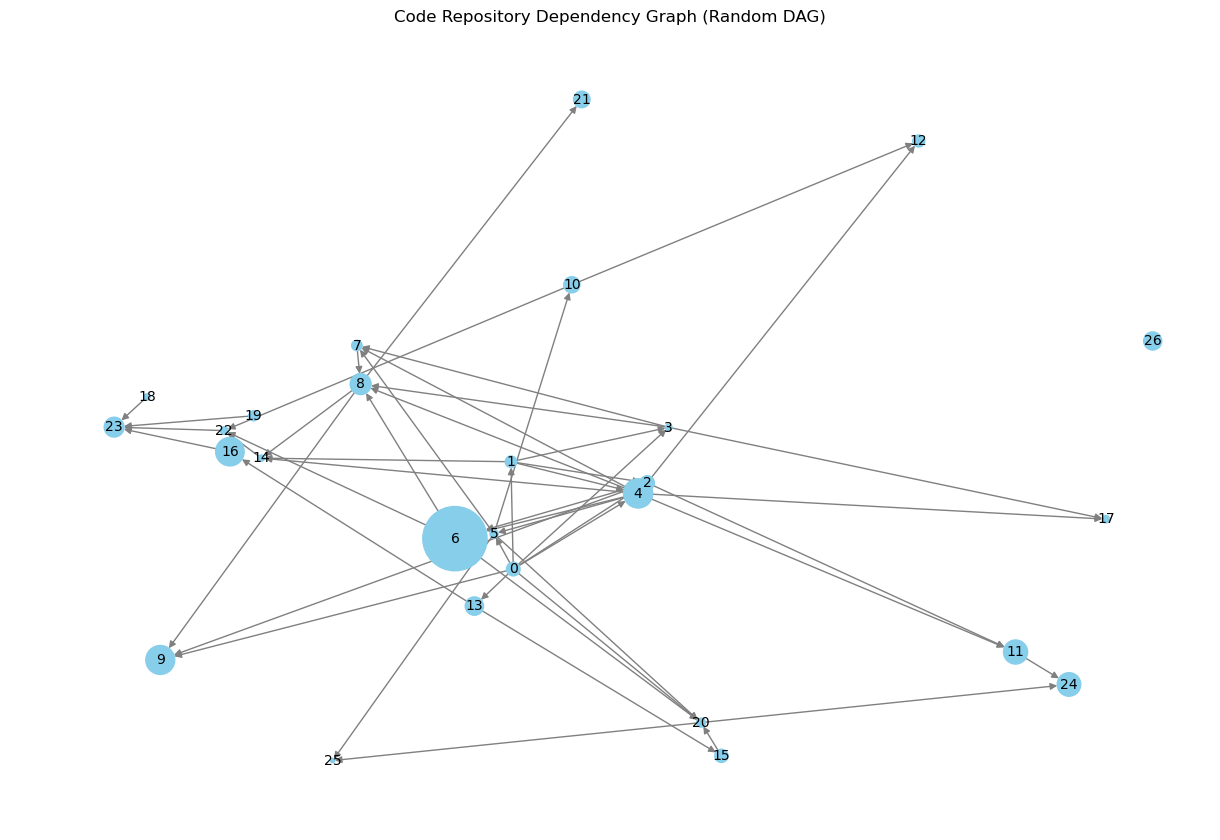

In [88]:
from matplotlib import pyplot as plt
def visualize_graph(G):
    # Extract node sizes based on the 'size' attribute
    node_sizes = [G.nodes[node]['size'] for node in G.nodes]
    
    # Generate positions for nodes using spring layout
    pos = nx.spring_layout(G)
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    labels = {node: f'{G.in_degree(node)}|{G.out_degree(node)}' for node in G.nodes}
    nx.draw(
        G,
        pos,
        with_labels=True,
        # labels=labels,  # Use in-degree as labels
        node_size=node_sizes,  # Scale by file size
        node_color="skyblue",
        edge_color="gray",
        arrows=True,
        font_size=10,
    )
    
    # Show plot
    plt.title("Code Repository Dependency Graph (Random DAG)")
    plt.show()

# Example usage with your generated graph
graph = random_dag(27)
visualize_graph(graph)

# Random Code Tree

In [54]:
import networkx as nx
import numpy as np
import random

def random_tree(n):
    # Create a directed graph (initially a tree)
    G = nx.DiGraph()

    # Generate file sizes using a lognormal distribution
    file_sizes = np.random.lognormal(mean=5, sigma=1, size=n)
    
    # Add nodes with file size attributes
    for i in range(n):
        G.add_node(i, size=file_sizes[i], complexity=random.uniform(0, 1))

    # Create a tree structure where branching factor is proportional to file size
    for i in range(1, n):  # Start from 1 since 0 is the root
        # Probability of being chosen as a parent is proportional to file size
        parent = np.random.choice(range(i), p=file_sizes[:i] / np.sum(file_sizes[:i]))
        G.add_edge(i, parent)

    # Add random cross-tree dependencies to simulate real-world complexity
    num_cross_dependencies = n // 5  # Add ~20% cross-dependencies
    for _ in range(num_cross_dependencies):
        src = np.random.randint(0, n)
        tgt = np.random.randint(0, n)
        if src != tgt and not nx.has_path(G, tgt, src):  # Avoid cycles
            G.add_edge(src, tgt)

    return G

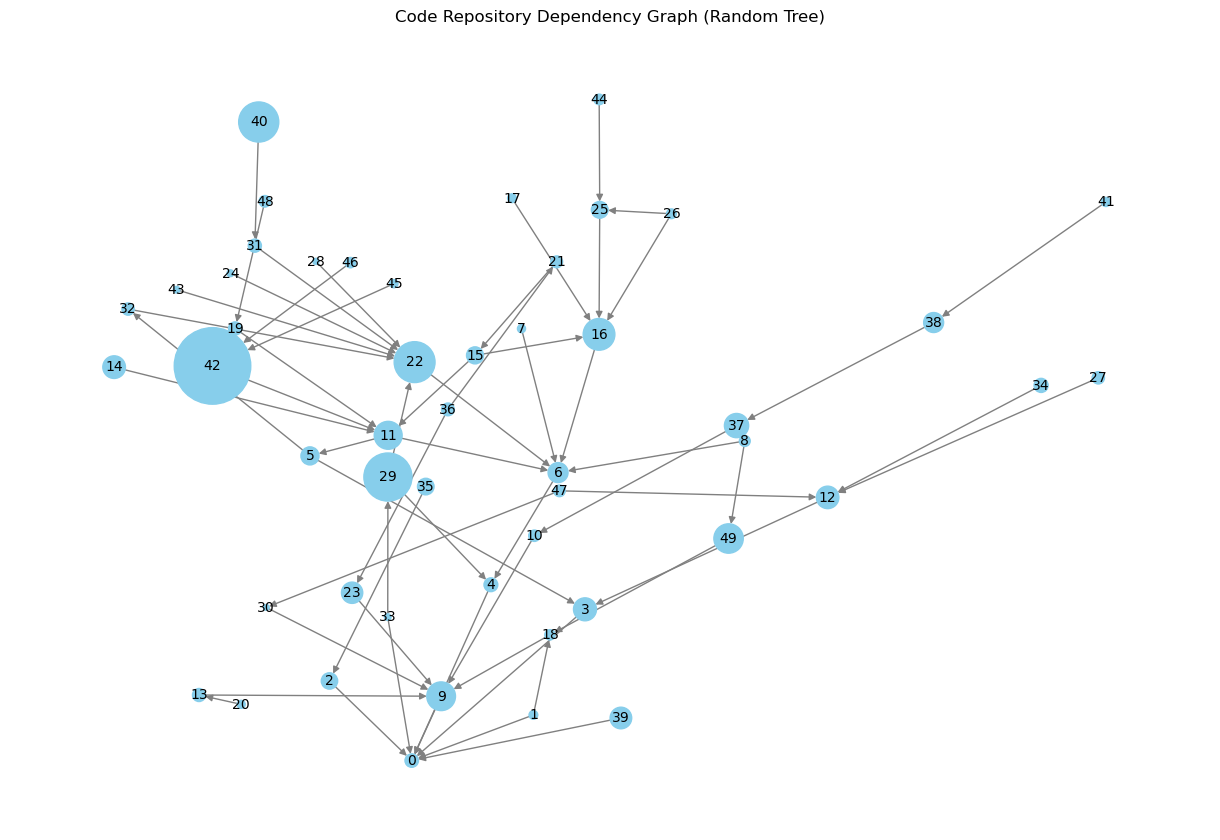

In [71]:
from matplotlib import pyplot as plt
def visualize_graph(G):
    # Extract node sizes based on the 'size' attribute
    node_sizes = [G.nodes[node]['size'] for node in G.nodes]
    
    # Generate positions for nodes using spring layout
    pos = nx.spring_layout(G)
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    labels = {node: f'{G.in_degree(node)}|{G.out_degree(node)}' for node in G.nodes}
    nx.draw(
        G,
        pos,
        with_labels=True,
        # labels=labels,  # Use in-degree as labels
        node_size=node_sizes,  # Scale by file size
        node_color="skyblue",
        edge_color="gray",
        arrows=True,
        font_size=10,
    )
    
    # Show plot
    plt.title("Code Repository Dependency Graph (Random Tree)")
    plt.show()

# Example usage with your generated graph
graph = random_tree(50)
visualize_graph(graph)

# Random GNP

In [83]:
import random
import networkx as nx
import numpy as np

def random_gnp(n):
    p = random.uniform(0, 0.1)  # Random probability of edge creation
    # Create a random directed graph
    G = nx.gnp_random_graph(n, p, directed=True)

    # Add random file sizes to nodes
    for node in G.nodes:
        G.nodes[node]['size'] = np.random.lognormal(mean=5, sigma=1)
        G.nodes[node]['complexity'] = random.uniform(0, 1)

    return G

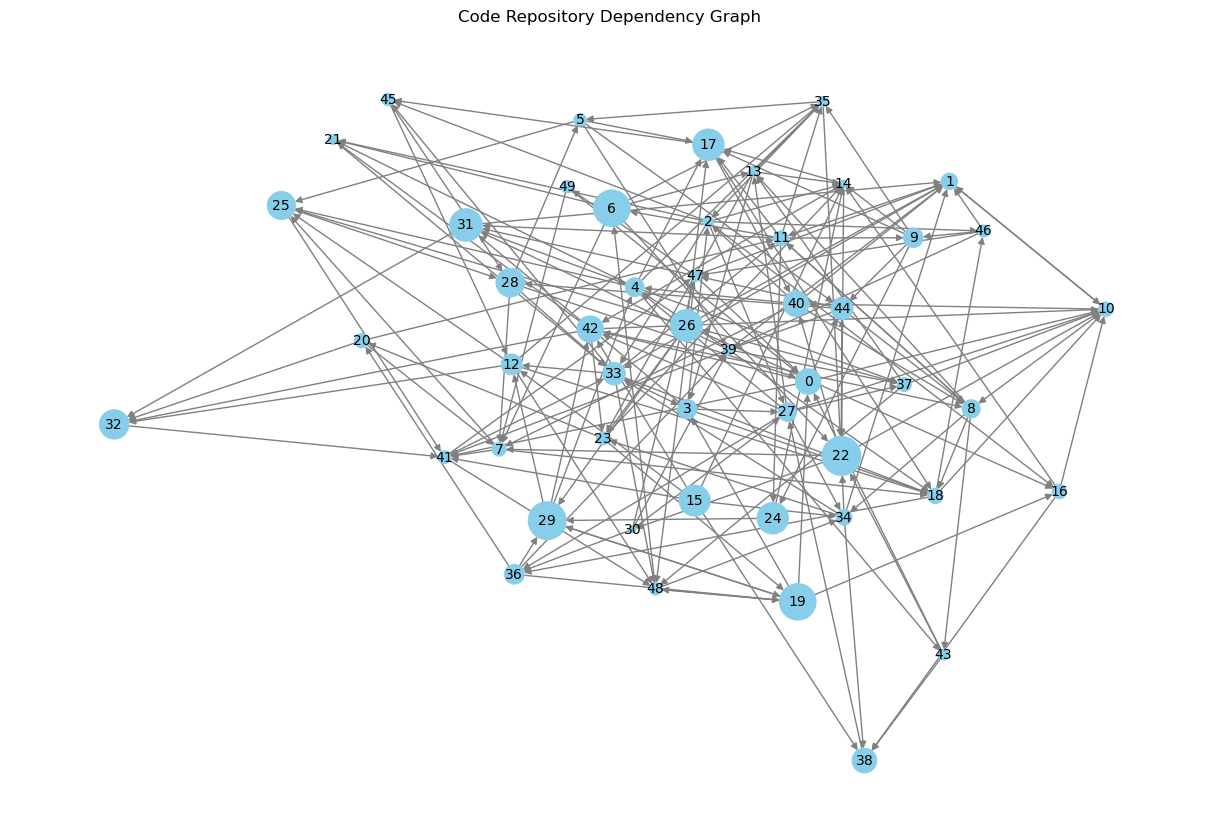

In [85]:
from matplotlib import pyplot as plt
def visualize_graph(G):
    # Extract node sizes based on the 'size' attribute
    node_sizes = [G.nodes[node]['size'] for node in G.nodes]
    
    # Generate positions for nodes using spring layout
    pos = nx.spring_layout(G)
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    labels = {node: f'{G.in_degree(node)}|{G.out_degree(node)}' for node in G.nodes}
    nx.draw(
        G,
        pos,
        with_labels=True,
        # labels=labels,  # Use in-degree as labels
        node_size=node_sizes,  # Scale by file size
        node_color="skyblue",
        edge_color="gray",
        arrows=True,
        font_size=10,
    )
    
    # Show plot
    plt.title("Code Repository Dependency Graph")
    plt.show()

# Example usage with your generated graph
graph = random_gnp(n=50)
visualize_graph(graph)